<a href="https://colab.research.google.com/github/aRod209/pytorch-for-deep-learning/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Feb 19 22:23:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Autonomous vehicles, facial recognition, cancer detection

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when your a machine learning model fits very well to the training data but it does not fit/generalize well to new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Regularization: Introduces a penalty on model complexity into the loss function.
- Cross-Validation: Training a model on different folds of data ensures the model's performance is not overly dependant on a particular partition of the training data.
- More training data: More data can help the model generalize better to new data by training on more data that does not have the same outliers as existing training data but does have the same general patterns that are important to focus on.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root='data', # where to download data to
    train=True, # create dataset from training data
    download=True, # download from internet and put in root directory
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform the target/labels
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9912422/9912422 [00:00<00:00, 80649513.29it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 113316832.39it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33028756.85it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20180644.88it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [7]:
image, label = train_data[0]
print(f'Image shape: {image.shape} -> [color channel, height, width]')
print(f'Image label: {train_data.classes[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Image label: 5 - five


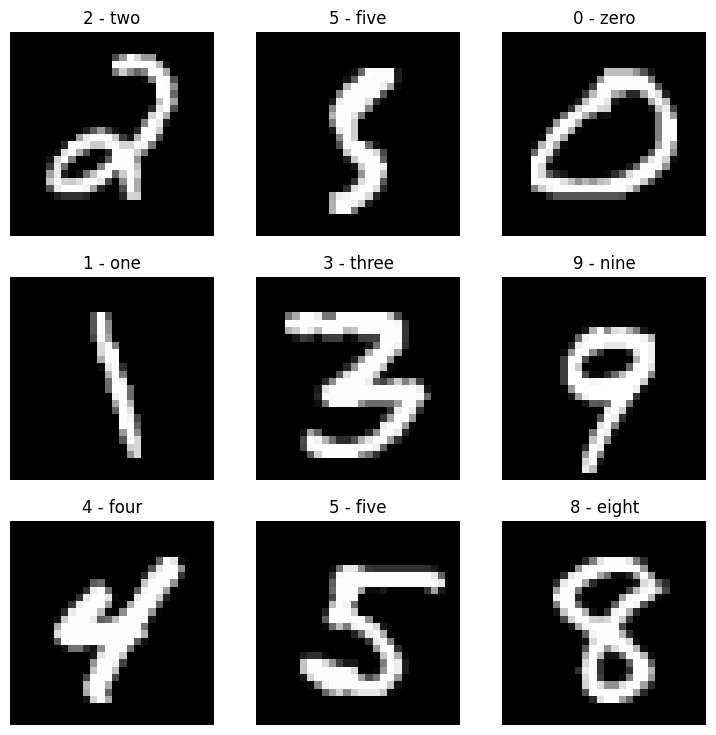

In [8]:
# Import matplotlib for visualizations
import matplotlib.pyplot as plt

torch.manual_seed(7)

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=(1,)).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

In [10]:
print(f'DataLoaders: {train_dataloader}, {test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: <torch.utils.data.dataloader.DataLoader object at 0x7bc096e29ff0>, <torch.utils.data.dataloader.DataLoader object at 0x7bc096e2a110>
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
class TinyVGG(nn.Module):
  """
  Model recreates the Tiny VGG model from
  the CNN Explainer website.
  Tiny VGG uses a 3x3 kernel size in convulational layers,
  with a stride of 1 and zero-padding,
  and a 2x2 kernel size in the max pool layers.

  This is different from what was actually done in the video lecture.
  """
  CONV_LAYER_KERNEL_SIZE = 3
  MAX_POOL_KERNEL_SIZE = 2
  STRIDE = 1
  PADDING = 0

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.MAX_POOL_KERNEL_SIZE)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.MAX_POOL_KERNEL_SIZE)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    print(f'Output shape of input x: {x.shape}')
    x = self.conv_block_1(x)
    print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    print(f'Output shape of classifier: {x.shape}')
    return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
from timeit import default_timer as timer

In [ ]:
# Create function to time experiments
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')

In [ ]:
# Create training step
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs training step with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_logits = model(X)
    y_preds = y_logits.argmax(dim=1)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_preds)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update model's parameters once per batch)
    optimizer.step()

    # 6. Print out what's happening
    if batch % 300 or batch == len(data_loader)-1:
      print(f'Looked at {batch * len(X)}/{len(data_loader.dataset)} samples')

  # 7. Adjust metrics and print out results
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}')

In [ ]:
# Create test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_logits = model(X)
      test_preds = test_logits.argmax(dim=1)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_logits, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_preds)

    # 3. Adjust metrics and print out results
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}')

In [ ]:
# Create method to train and test model
def train_and_test(model: torch.nn.Module,
                   data_loader: torch.utils.DataLoader,
                   loss_fn: torch.nn.Module,
                   optimizer: torch.optim.Optimizer,
                   accuracy_fn,
                   epochs: int,
                   device: torch.device = device):
  """Trains and tests model on data_loader."""
  train_time_start = timer()

  for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------------')

    train_step(model=model,
               data_loader=data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model,
              data_loader=data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

  train_time_end = timer()
  total_train_time = print_train_time(start = train_time_start,
                                      end = train_time_end,
                                      device = device)

In [ ]:
# Set hidden units and color channel
TINY_VGG_HIDDEN_UNITS = 10
color_channel, _, _ = image.shape

In [ ]:
# Create Tiny VGG model on CPU
tiny_vgg_cpu = TinyVGG(input_shape=color_channel,
                       hidden_units=TINY_VGG_HIDDEN_UNITS,
                       output_shape=len(train_data.class_to_idx)).to('cpu')

tiny_vgg_cpu

In [ ]:
# Crate Tiny VGG model on GPU
tiny_vgg_cuda = TinyVGG(input_shape=color_channel
                        hidden_units=TINY_VGG_HIDDEN_UNITS,
                        outpub_shape=len(train_data.class_to_idx)).to('cuda')

tiny_vgg_cuda

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [ ]:
torch.manual_seed(7)





## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?